Logistic Regression Accuracy: 0.9776223776223776
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       360
           1       0.98      0.98      0.98       355

    accuracy                           0.98       715
   macro avg       0.98      0.98      0.98       715
weighted avg       0.98      0.98      0.98       715



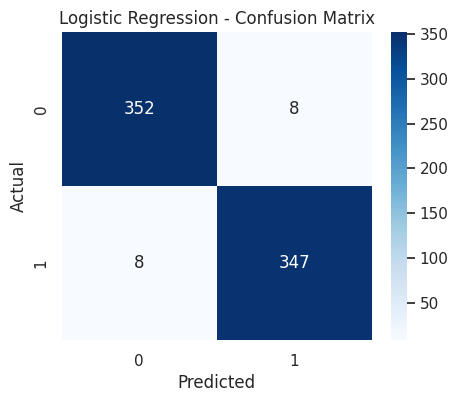

Decision Tree Accuracy: 0.993006993006993
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       360
           1       1.00      0.99      0.99       355

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



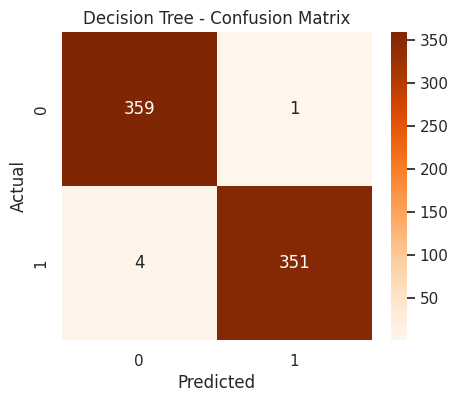

Random Forest Accuracy: 0.9986013986013986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       355

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



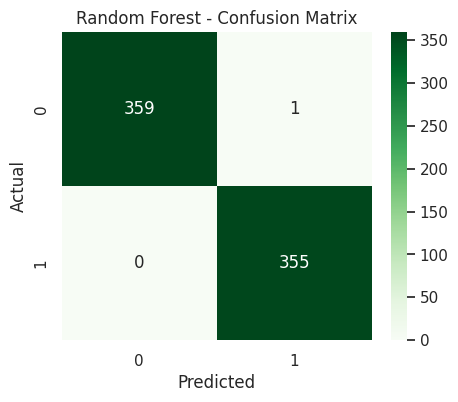

Naive Bayes Accuracy: 0.9524475524475524
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       360
           1       0.96      0.95      0.95       355

    accuracy                           0.95       715
   macro avg       0.95      0.95      0.95       715
weighted avg       0.95      0.95      0.95       715



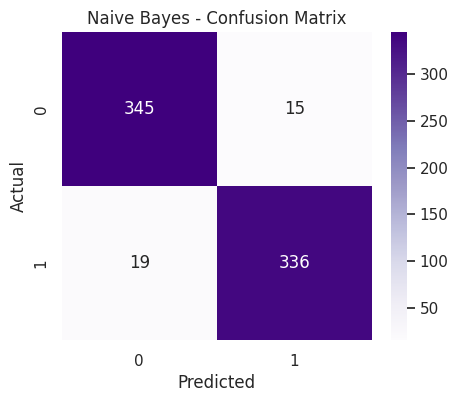

SVM Accuracy: 0.9832167832167832
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       360
           1       0.99      0.98      0.98       355

    accuracy                           0.98       715
   macro avg       0.98      0.98      0.98       715
weighted avg       0.98      0.98      0.98       715



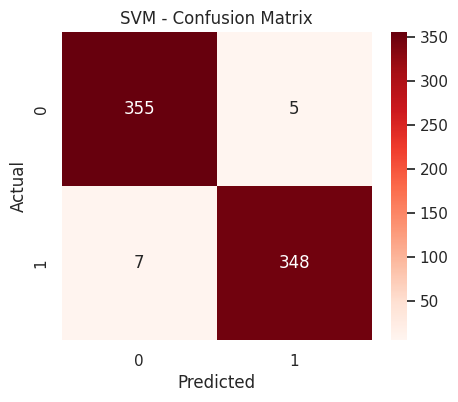

XGBoost Accuracy: 0.9972027972027973
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       360
           1       1.00      0.99      1.00       355

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



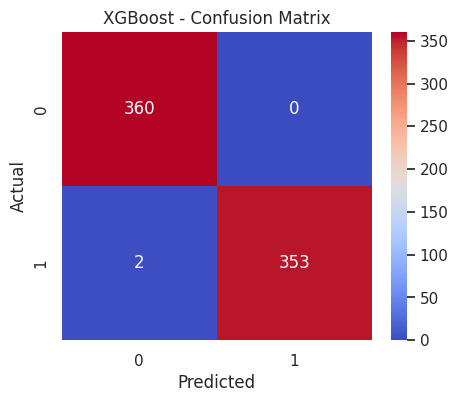

In [4]:
# ==========================
# Fake News (Individual Models)
# ==========================

# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 2. Load Dataset (safe)
df_news = pd.read_csv(
    '/content/clean_fake_news.csv',
    engine='python',
    encoding='utf-8',
    on_bad_lines='skip'
)

# 3. Feature Engineering (TF-IDF)
tfidf_news = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_news = tfidf_news.fit_transform(df_news['text'])
y_news = df_news['label']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# ==========================
# 5. Logistic Regression
# ==========================
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 6. Decision Tree
# ==========================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 7. Random Forest
# ==========================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 8. Naive Bayes
# ==========================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Purples")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 9. SVM (Linear Kernel)
# ==========================
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 10. XGBoost
# ==========================
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="coolwarm")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Accuracy: 0.9649595687331537
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       951
           1       0.99      0.77      0.86       162

    accuracy                           0.96      1113
   macro avg       0.98      0.88      0.92      1113
weighted avg       0.97      0.96      0.96      1113



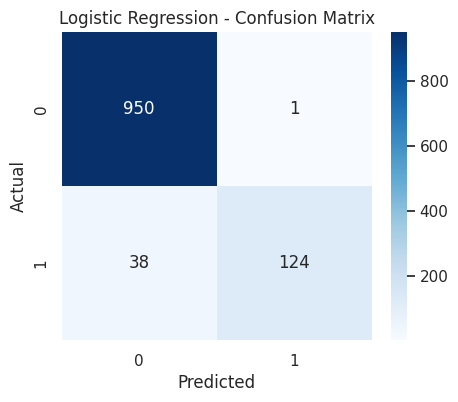

Decision Tree Accuracy: 0.9649595687331537
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       951
           1       0.88      0.88      0.88       162

    accuracy                           0.96      1113
   macro avg       0.93      0.93      0.93      1113
weighted avg       0.97      0.96      0.97      1113



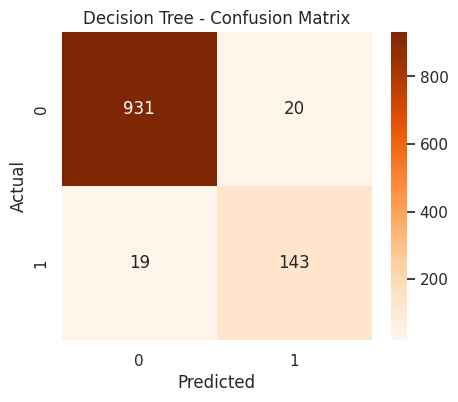

Random Forest Accuracy: 0.9793351302785265
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       0.99      0.87      0.92       162

    accuracy                           0.98      1113
   macro avg       0.98      0.93      0.96      1113
weighted avg       0.98      0.98      0.98      1113



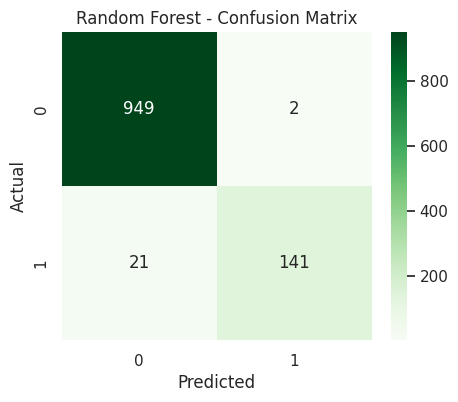

Naive Bayes Accuracy: 0.9757412398921833
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       951
           1       0.99      0.84      0.91       162

    accuracy                           0.98      1113
   macro avg       0.98      0.92      0.95      1113
weighted avg       0.98      0.98      0.97      1113



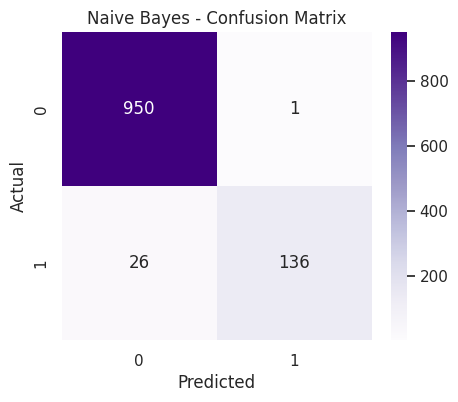

SVM Accuracy: 0.9847259658580413
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       0.99      0.90      0.94       162

    accuracy                           0.98      1113
   macro avg       0.99      0.95      0.97      1113
weighted avg       0.98      0.98      0.98      1113



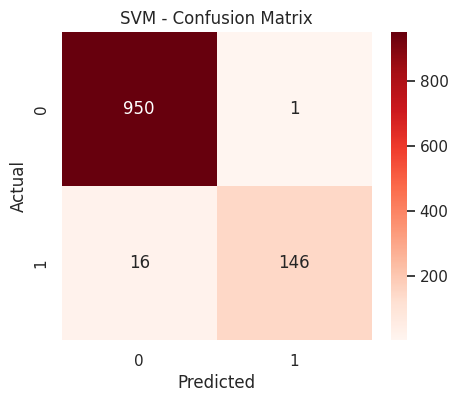

XGBoost Accuracy: 0.9685534591194969
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       951
           1       0.95      0.83      0.88       162

    accuracy                           0.97      1113
   macro avg       0.96      0.91      0.93      1113
weighted avg       0.97      0.97      0.97      1113



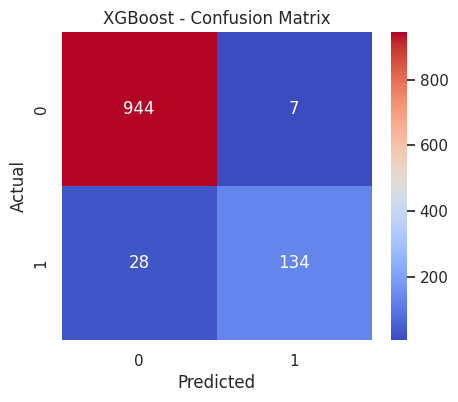

In [5]:
# ==========================
# SMS Spam (Individual Models)
# ==========================

# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 2. Load Dataset (safe)
df_sms = pd.read_csv(
    '/content/clean_sms_spam.csv',
    engine='python',
    encoding='utf-8',
    on_bad_lines='skip'
)

# 3. Feature Engineering (TF-IDF)
tfidf_sms = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1,2))
X_sms = tfidf_sms.fit_transform(df_sms['text'])
y_sms = df_sms['label']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sms, y_sms, test_size=0.2, random_state=42)

# ==========================
# 5. Logistic Regression
# ==========================
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 6. Decision Tree
# ==========================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 7. Random Forest
# ==========================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 8. Naive Bayes
# ==========================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Purples")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 9. SVM (Linear Kernel)
# ==========================
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================
# 10. XGBoost
# ==========================
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="coolwarm")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
# ==========================
# Comparison Table - Fake News
# ==========================
from sklearn.metrics import f1_score

models_news = ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "SVM", "XGBoost"]
acc_values_news = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb)
]
f1_values_news = [
    f1_score(y_test, y_pred_lr, average='macro'),
    f1_score(y_test, y_pred_dt, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_nb, average='macro'),
    f1_score(y_test, y_pred_svm, average='macro'),
    f1_score(y_test, y_pred_xgb, average='macro')
]

df_news_comp = pd.DataFrame({
    "Model": models_news,
    "Accuracy": acc_values_news,
    "F1-Score": f1_values_news
}).sort_values(by="Accuracy", ascending=False)

print("\n===== Fake News Dataset - Model Comparison =====\n")
print(df_news_comp)



===== Fake News Dataset - Model Comparison =====

                 Model  Accuracy  F1-Score
4                  SVM  0.984726  0.968058
2        Random Forest  0.979335  0.956309
3          Naive Bayes  0.975741  0.947844
5              XGBoost  0.968553  0.933144
1        Decision Tree  0.964960  0.929742
0  Logistic Regression  0.964960  0.921999


In [9]:
# ==========================
# Comparison Table - SMS Spam
# ==========================
models_sms = ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "SVM", "XGBoost"]
acc_values_sms = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb)
]
f1_values_sms = [
    f1_score(y_test, y_pred_lr, average='macro'),
    f1_score(y_test, y_pred_dt, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_nb, average='macro'),
    f1_score(y_test, y_pred_svm, average='macro'),
    f1_score(y_test, y_pred_xgb, average='macro')
]

df_sms_comp = pd.DataFrame({
    "Model": models_sms,
    "Accuracy": acc_values_sms,
    "F1-Score": f1_values_sms
}).sort_values(by="Accuracy", ascending=False)

print("\n===== SMS Spam Dataset - Model Comparison =====\n")
print(df_sms_comp)



===== SMS Spam Dataset - Model Comparison =====

                 Model  Accuracy  F1-Score
4                  SVM  0.984726  0.968058
2        Random Forest  0.979335  0.956309
3          Naive Bayes  0.975741  0.947844
5              XGBoost  0.968553  0.933144
1        Decision Tree  0.964960  0.929742
0  Logistic Regression  0.964960  0.921999


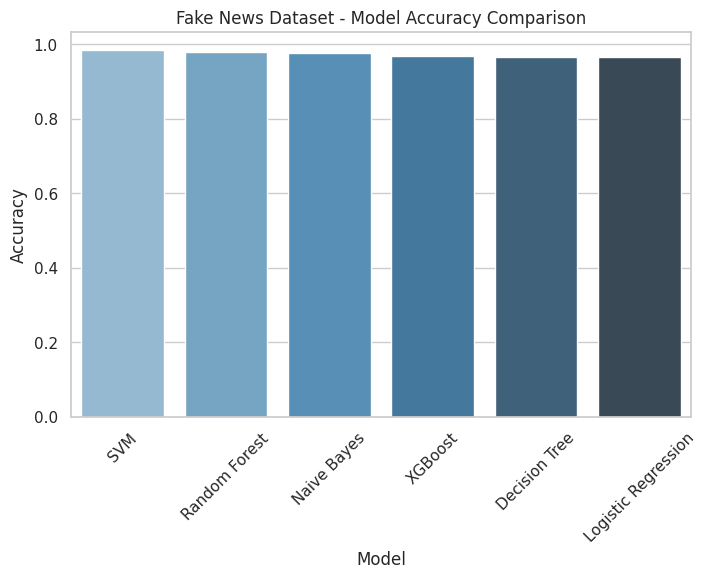

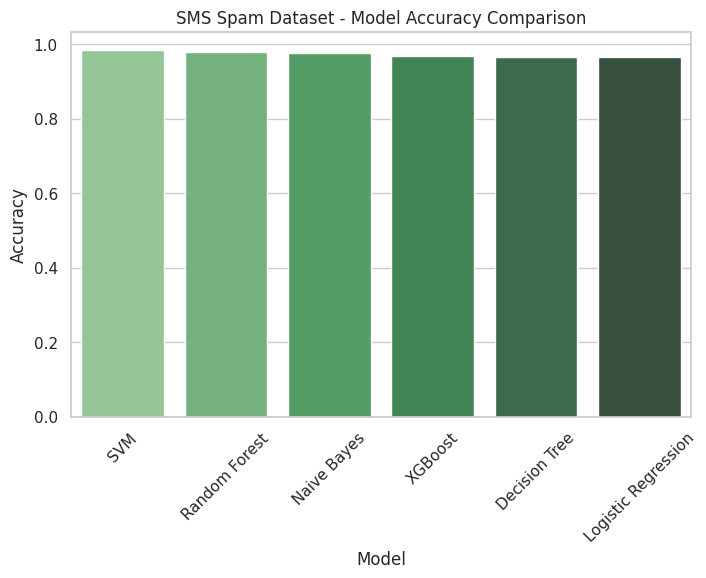

In [13]:
# Fake News Accuracy Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x="Model",
    y="Accuracy",
    hue="Model",                # assign hue same as x
    data=df_news_comp,
    palette="Blues_d",
    legend=False                # remove duplicate legend
)

plt.title("Fake News Dataset - Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# SMS Spam Accuracy Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x="Model",
    y="Accuracy",
    hue="Model",
    data=df_sms_comp,
    palette="Greens_d",
    legend=False
)
plt.title("SMS Spam Dataset - Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()


In [11]:
best_model_news = df_news_comp.iloc[0]
print(f"\n🏆 Best Model for Fake News: {best_model_news['Model']} "
      f"(Accuracy = {best_model_news['Accuracy']:.4f}, F1 = {best_model_news['F1-Score']:.4f})")

best_model_sms = df_sms_comp.iloc[0]
print(f"🏆 Best Model for SMS Spam: {best_model_sms['Model']} "
      f"(Accuracy = {best_model_sms['Accuracy']:.4f}, F1 = {best_model_sms['F1-Score']:.4f})")



🏆 Best Model for Fake News: SVM (Accuracy = 0.9847, F1 = 0.9681)
🏆 Best Model for SMS Spam: SVM (Accuracy = 0.9847, F1 = 0.9681)
